In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### Preprocessing data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data['mainroad'] = data['mainroad'].replace({'yes': 1, 'no' : 0})
data['guestroom'] = data['guestroom'].replace({'yes': 1, 'no' : 0})
data['basement'] = data['basement'].replace({'yes': 1, 'no' : 0})
data['hotwaterheating'] = data['hotwaterheating'].replace({'yes': 1, 'no' : 0})
data['airconditioning'] = data['airconditioning'].replace({'yes': 1, 'no' : 0})
data['prefarea'] = data['prefarea'].replace({'yes': 1, 'no' : 0})
data['furnishingstatus'] = data['furnishingstatus'].replace({'furnished' : 1, 'semi-furnished' : 0, 'unfurnished' : -1})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [ ]:
data.groupby('bedrooms')['price'].mean()

bedrooms
1    2.712500e+06
2    3.632022e+06
3    4.954598e+06
4    5.729758e+06
5    5.819800e+06
6    4.791500e+06
Name: price, dtype: float64

In [ ]:
data.groupby('bathrooms')['price'].mean()

bathrooms
1    4.206913e+06
2    6.209206e+06
3    7.282100e+06
4    1.225000e+07
Name: price, dtype: float64

## Exploratory

Text(0.5, 1.0, 'Price')

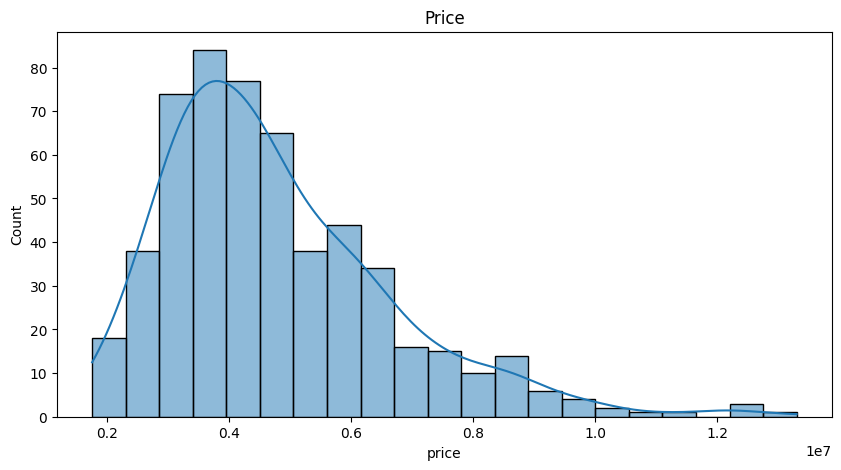

In [ ]:
plt.subplots(figsize = (10,5))
sns.histplot(data.price, kde = True)
plt.title('Price')

Text(0.5, 1.0, 'Area vs Price')

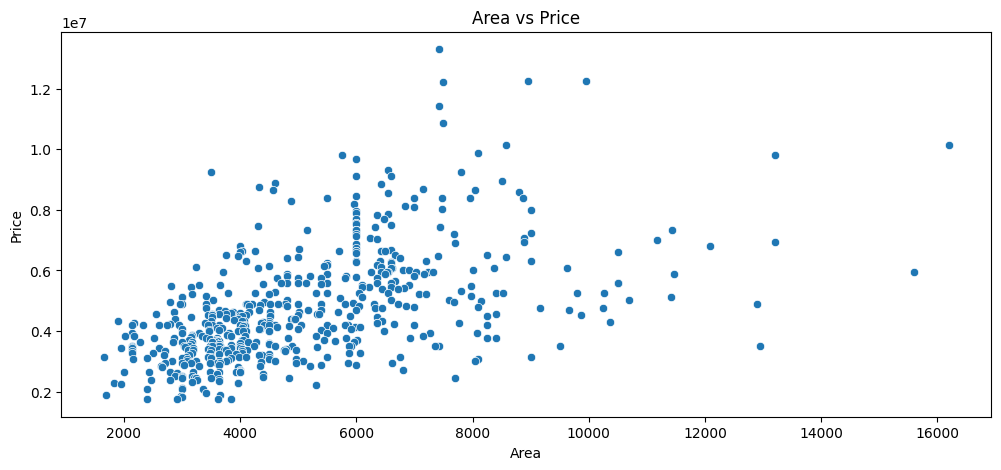

In [ ]:
plt.subplots(figsize = (12,5))
sns.scatterplot(data = data, x = 'area', y = 'price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')

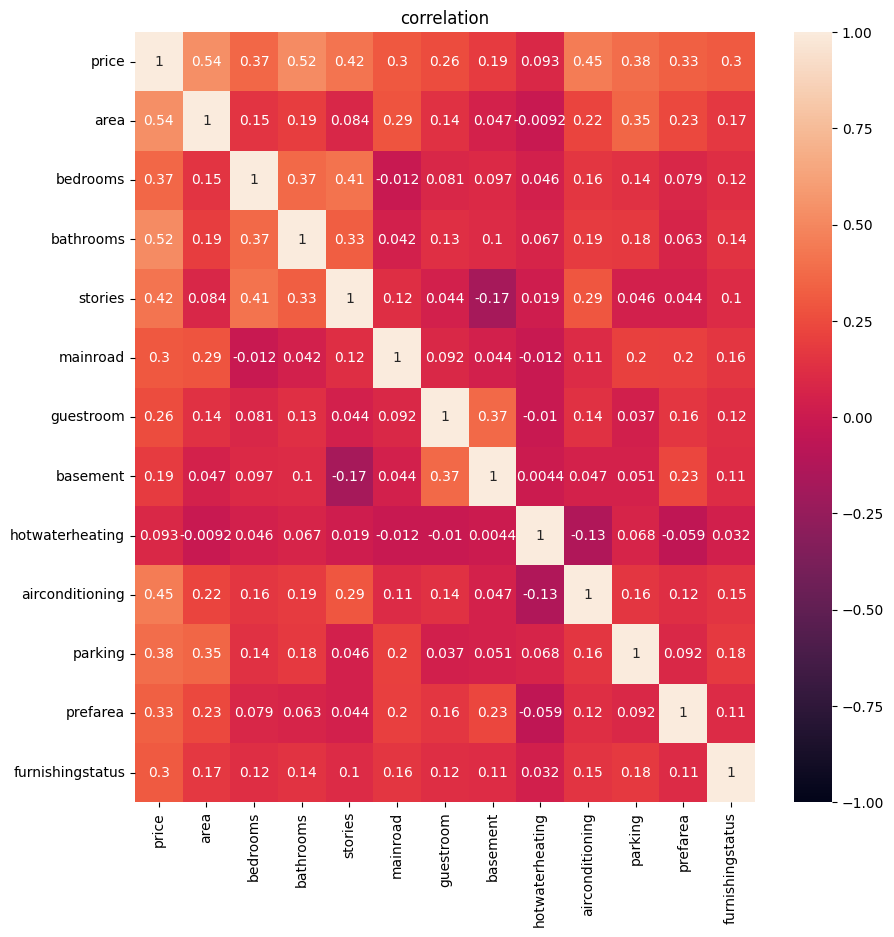

In [ ]:
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
plt.title('correlation')
plt.show()

<ipython-input-13-8063e09c994b>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


Text(0.5, 1.0, 'Bathrooms vs Price')

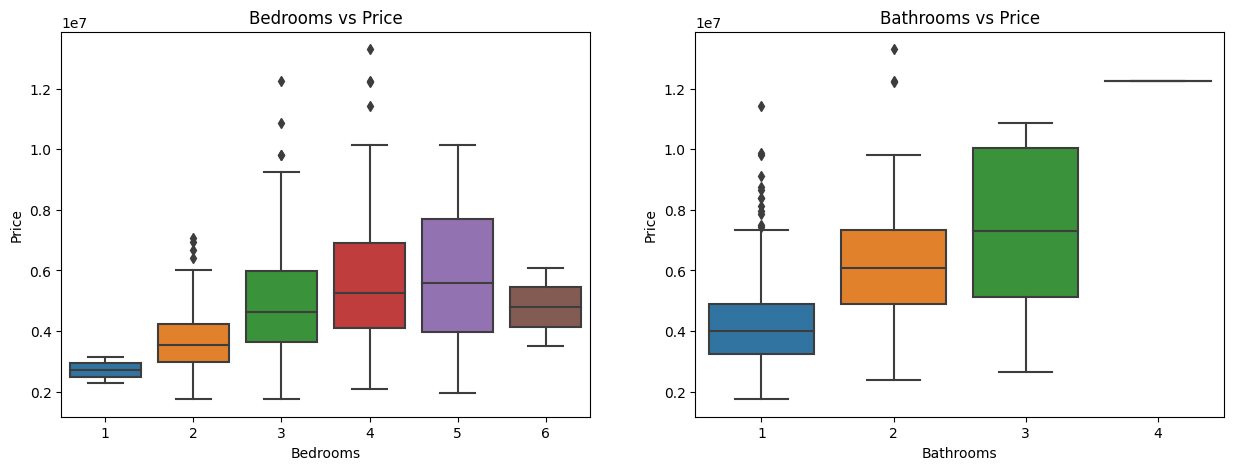

In [ ]:
plt.subplots(figsize = (15,5))
plt.subplot(121)
sns.boxplot(data = data, x = 'bedrooms', y = 'price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')

plt.subplot(122)
sns.boxplot(data = data, x = 'bathrooms', y = 'price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Bathrooms vs Price')


<ipython-input-14-532ca5ae5eff>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Stories vs Price')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


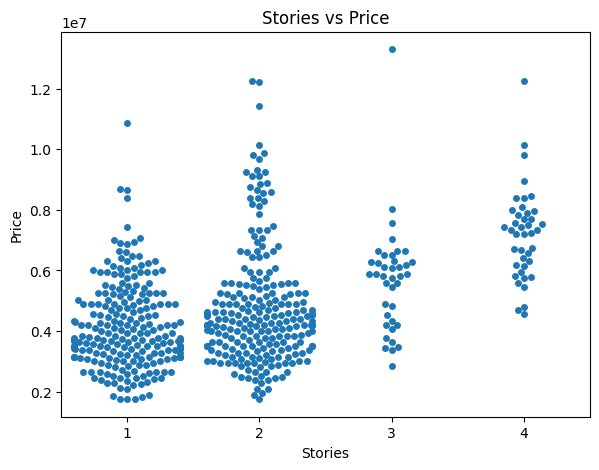

In [ ]:
plt.subplots(figsize = (15,5))
plt.subplot(121)
sns.swarmplot(data = data, x = 'stories', y = 'price')
plt.xlabel('Stories')
plt.ylabel('Price')
plt.title('Stories vs Price')

<ipython-input-15-beb413b0ced7>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


Text(0, 0.5, 'price')

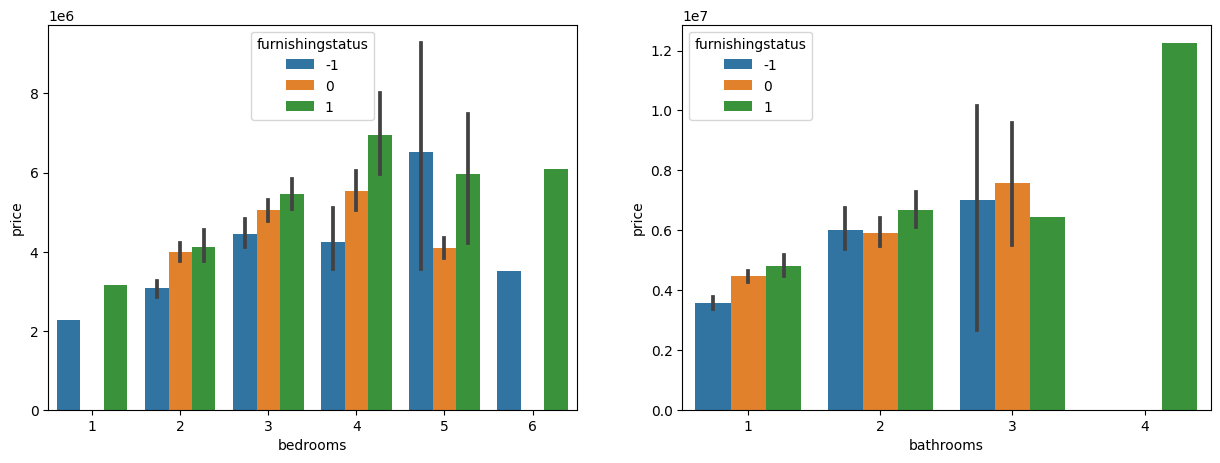

In [ ]:
plt.subplots(figsize = (15,5))
plt.subplot(121)
sns.barplot(data = data, x = 'bedrooms', y = 'price', hue = 'furnishingstatus')
plt.xlabel('bedrooms')
plt.ylabel('price')

plt.subplot(122)
sns.barplot(data = data, x = 'bathrooms', y = 'price', hue = 'furnishingstatus')
plt.xlabel('bathrooms')
plt.ylabel('price')

<Axes: xlabel='bathrooms', ylabel='price'>

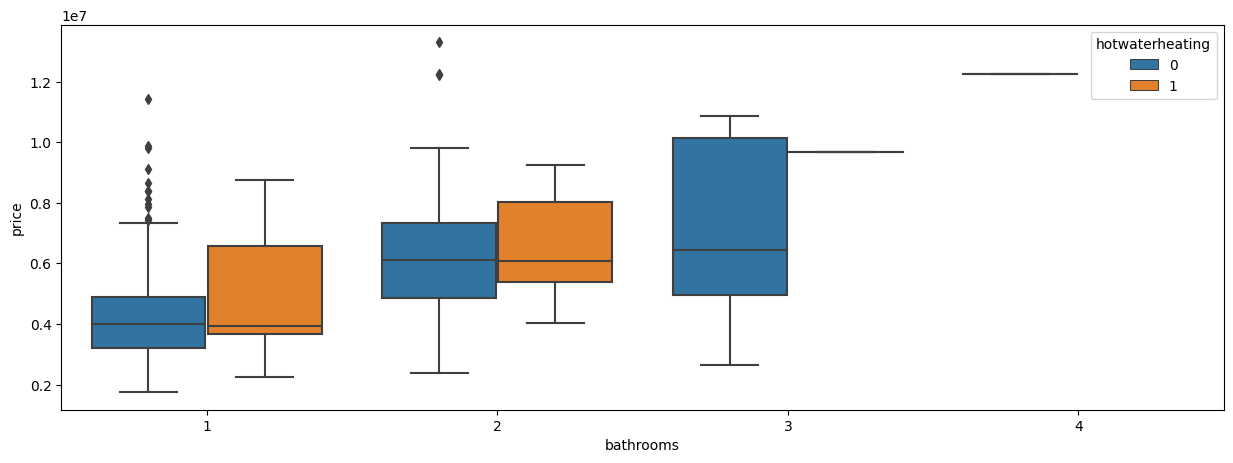

In [ ]:
plt.subplots(figsize = (15,5))
sns.boxplot(data = data, x = 'bathrooms', y = 'price', hue = 'hotwaterheating')

<ipython-input-17-2483ae62d71d>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


<Axes: xlabel='bedrooms', ylabel='price'>

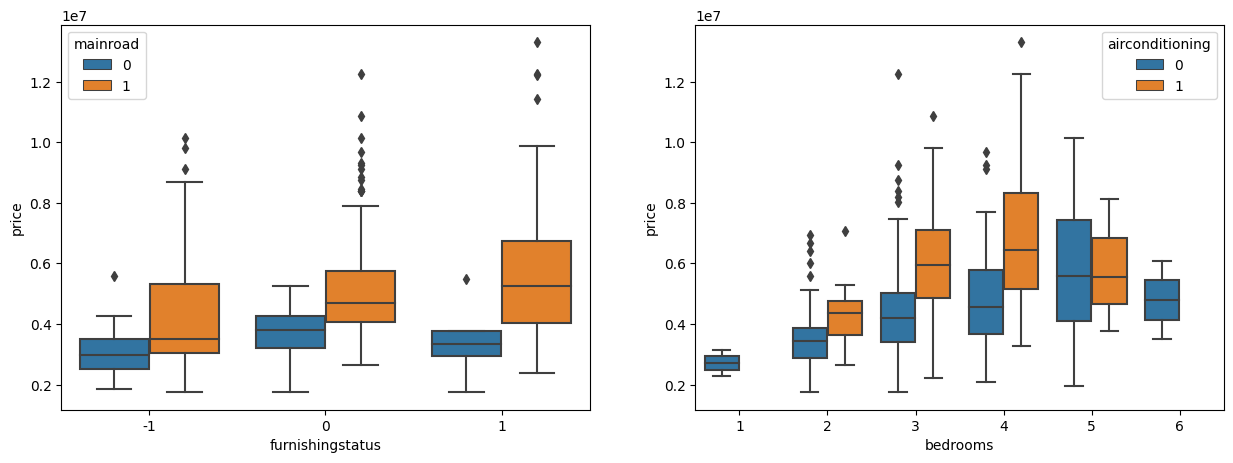

In [ ]:
plt.subplots(figsize = (15,5))
plt.subplot(121)
sns.boxplot(data = data, x = 'furnishingstatus', y = 'price', hue = 'mainroad')

plt.subplot(122)
sns.boxplot(data = data, x = 'bedrooms', y = 'price', hue = 'airconditioning')

<ipython-input-18-21ed1ec454ae>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


<Axes: xlabel='prefarea', ylabel='price'>

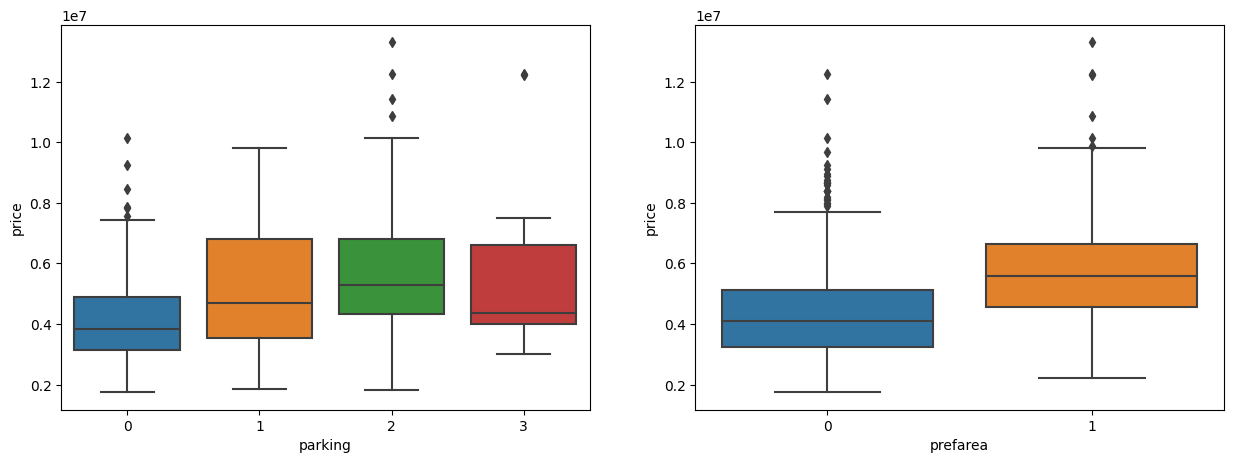

In [ ]:
plt.subplots(figsize = (15,5))
plt.subplot(121)
sns.boxplot(data = data, x = 'parking', y = 'price')

plt.subplot(122)
sns.boxplot(data = data, x = 'prefarea', y = 'price')

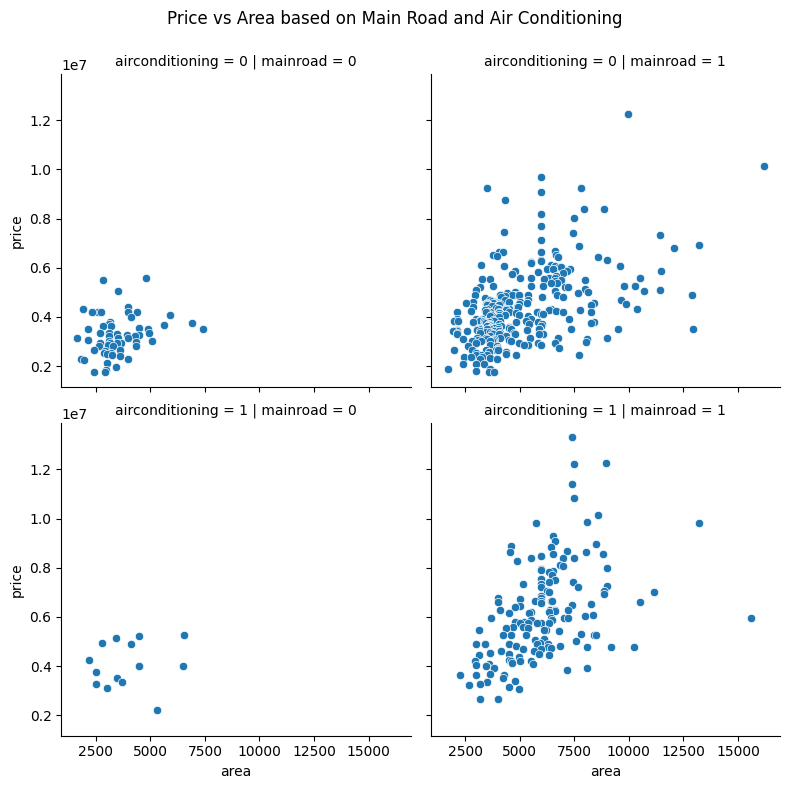

In [ ]:
main_air = sns.FacetGrid(data, col="mainroad", row="airconditioning", height=4)
main_air.map(sns.scatterplot, "area", "price")
plt.subplots_adjust(top = 0.9)
main_air.fig.suptitle("Price vs Area based on Main Road and Air Conditioning")
plt.show()

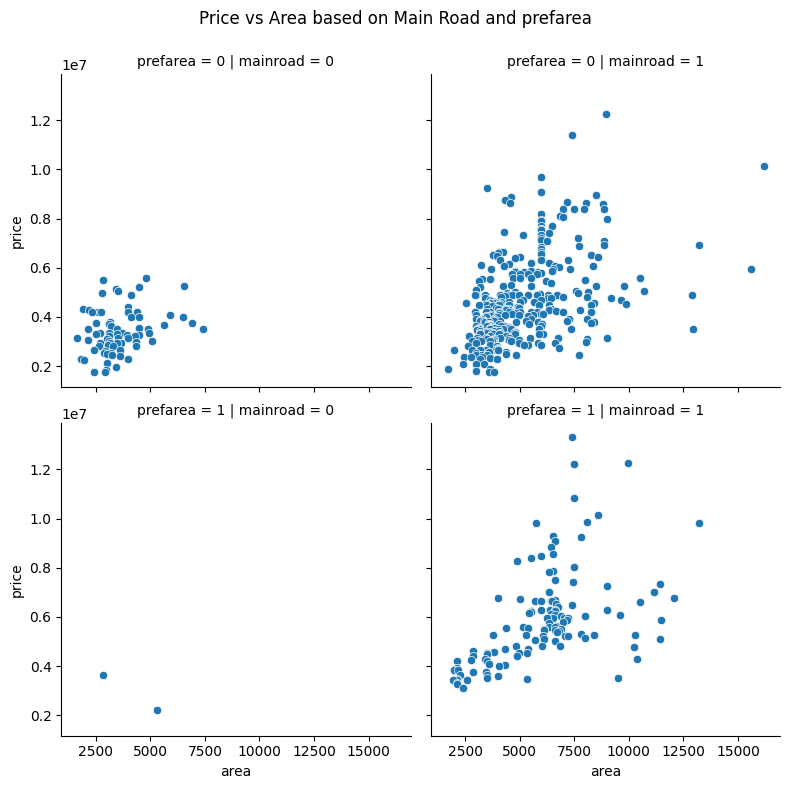

In [ ]:
main_pre = sns.FacetGrid(data, col="mainroad", row="prefarea", height=4)
main_pre.map(sns.scatterplot, "area", "price")
plt.subplots_adjust(top = 0.9)
main_pre.fig.suptitle("Price vs Area based on Main Road and prefarea")
plt.show()

### Modeling

In [ ]:
X = data.drop(['price'], axis =1)
y = data['price']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 1.04672629  1.40341936  1.42181174 ...  1.51769249  1.80494113
   1.40628573]
 [ 1.75700953  1.40341936  5.40580863 ...  2.67940935 -0.55403469
   1.40628573]
 [ 2.21823241  0.04727831  1.42181174 ...  1.51769249  1.80494113
   0.09166185]
 ...
 [-0.70592066 -1.30886273 -0.57018671 ... -0.80574124 -0.55403469
  -1.22296203]
 [-1.03338891  0.04727831 -0.57018671 ... -0.80574124 -0.55403469
   1.40628573]
 [-0.5998394   0.04727831 -0.57018671 ... -0.80574124 -0.55403469
  -1.22296203]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
LiReg_model = LinearRegression()
LiReg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#ค่า Accuracy
print("train score : ", LiReg_model.score(X_train, y_train))
print("test score : ", LiReg_model.score(X_test, y_test))

train score :  0.6854429472843788
test score :  0.6494754192267794


In [ ]:
y_pred = LiReg_model.predict(X_test)
y_pred

array([5203691.70963177, 7257004.02115475, 3062828.59668172,
       4559591.65374424, 3332932.30559783, 3563080.67918996,
       5645466.3121997 , 6413979.66873635, 2755831.54819001,
       2668938.6607523 , 9570600.29915351, 2827431.50860062,
       3195686.25834091, 3352263.99438472, 3713879.49996132,
       5301088.2443575 , 2987920.26669681, 4810799.8212371 ,
       4383031.70489929, 3525092.18938646, 5796259.50068013,
       5840000.702993  , 2760214.60864101, 4762590.14920608,
       5204755.73895204, 7515542.71619022, 3254681.68956383,
       5236164.45964445, 8178523.1682028 , 3434166.1567565 ,
       6443921.58767582, 3346004.77919185, 6742324.74004132,
       4154936.84088665, 3589152.47491253, 5788125.92515323,
       4768370.18154077, 4391684.04193173, 3217657.04549936,
       4638196.61928879, 4522160.27786713, 3541284.06127246,
       7238136.1194117 , 4021515.68926614, 3701978.76822756,
       4298879.55563098, 6705004.0206061 , 3993466.52296897,
       3798185.05328058,

In [ ]:
from sklearn import metrics
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred)) #ค่า Error = y_actual - y_pred
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Score : ', metrics.r2_score(y_test, y_pred))

#ค่าที่ predict ออกมาก็ต้อง +/- 1331071.4167895124 (ตามค่า RMSE)

MAE :  979679.6912959907
MSE :  1771751116594.0398
RMSE :  1331071.4167895124
Score :  0.6494754192267794


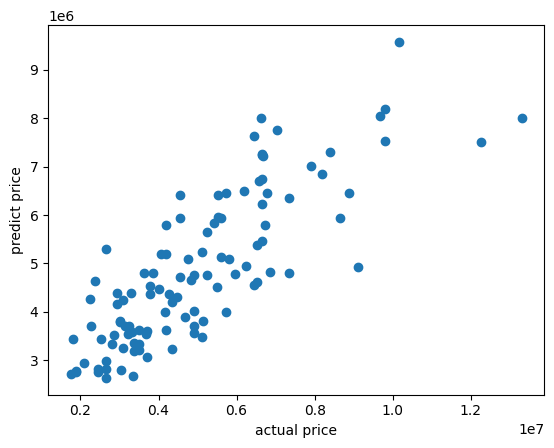

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual price')
plt.ylabel('predict price')
plt.show()